# Materials Project Element Distribution by Arity

In [ ]:
import pandas as pd
import plotly.io as pio
from pymatgen.ext.matproj import MPRester

from pymatviz import ptable_heatmap, ptable_heatmap_plotly


pio.templates.default = "plotly_white"
# Interactive plotly figures don't show up on GitHub.
# https://github.com/plotly/plotly.py/issues/931
# change renderer from "svg" to "notebook" to get hover tooltips back
# (but missing plots on GitHub!)
pio.renderers.default = "svg"

In [ ]:
with MPRester() as mpr:
    mp_data = mpr.query(
        criteria={"nelements": {"$lte": 4}},
        properties=["material_id", "pretty_formula", "nelements"],
    )

df_mp = pd.DataFrame(mp_data).set_index("material_id")

In [2]:
# uncomment line to cache large MP data
# %store df_mp

# uncomment line to load cached MP data from disk
%store -r df_mp

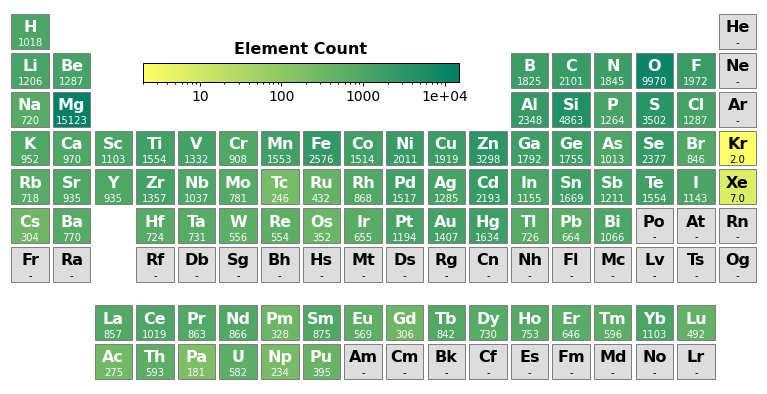

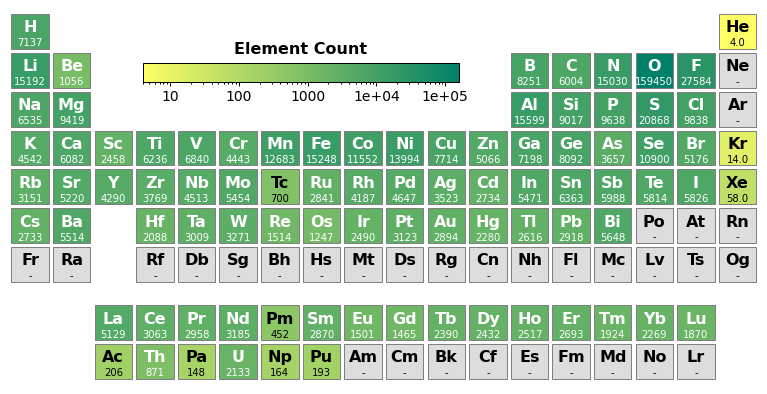

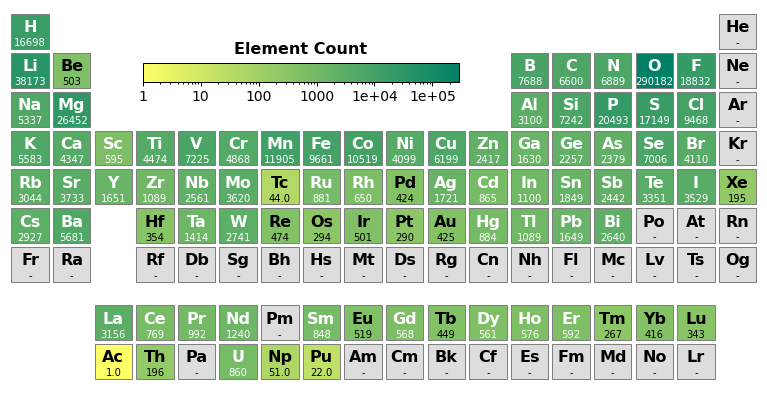

In [4]:
for idx, ary in enumerate(["binary", "ternary", "quaternary"], 2):
    ax = ptable_heatmap(df_mp.query(f"nelements == {idx}").pretty_formula, log=True)

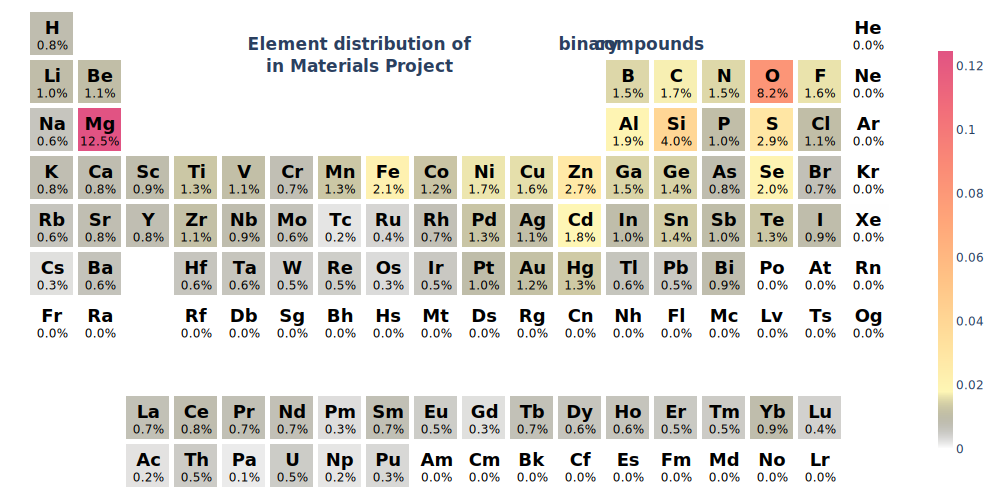

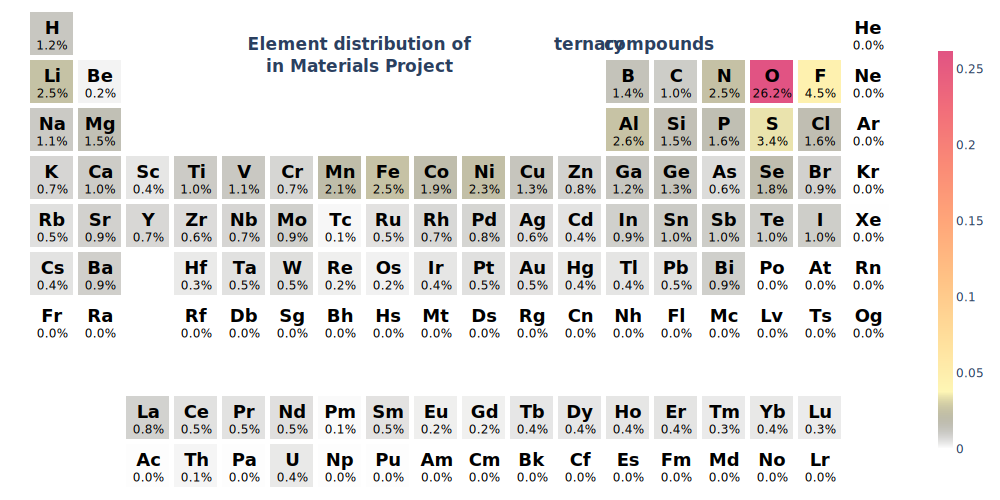

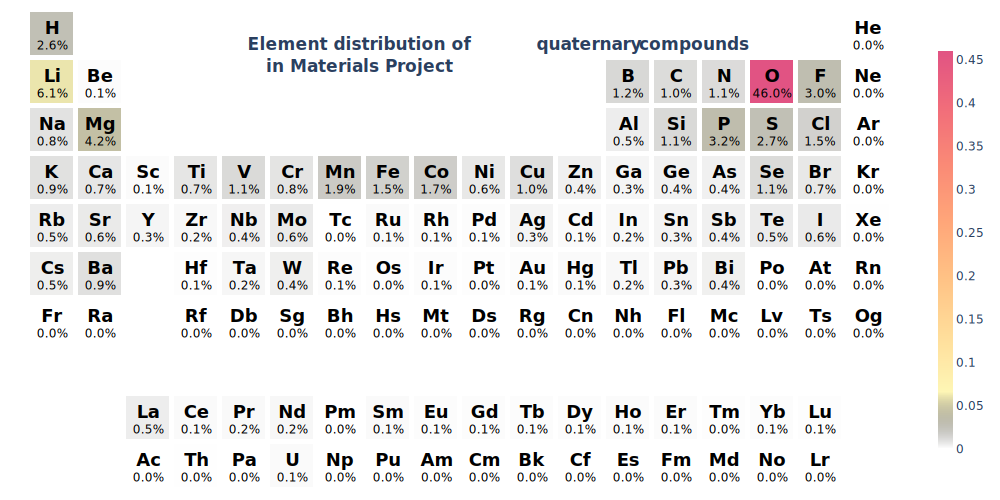

In [5]:
for idx, ary in enumerate(["binary", "ternary", "quaternary"], 2):
    fig = ptable_heatmap_plotly(
        df_mp.query(f"nelements == {idx}").pretty_formula,
        hover_props=["atomic_number", "type"],
        heat_mode="percent",
    )

    title = (
        f"<b>Element distribution of <i>{ary}</i> compounds<br>in Materials Project</b>"
    )
    fig.update_layout(title=dict(text=title, x=0.36, y=0.9))
    fig.show()